https://huggingface.co/stabilityai/sd-turbo

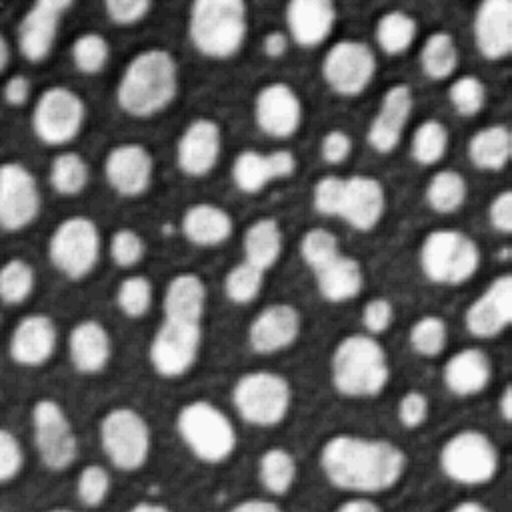

In [1]:
from skimage.io import imread
import numpy as np
import PIL
import stackview
from ipywidgets import FloatSlider, IntSlider, Text


image_np = imread("../../data/blobs.tif")
image_rgb_np = np.asarray([image_np, image_np, image_np]).swapaxes(0, 2).swapaxes(0, 1)
init_image = PIL.Image.fromarray(image_rgb_np)
init_image = init_image.resize((512, 512))
init_image

In [13]:
from diffusers import AutoPipelineForImage2Image
from diffusers.pipelines.stable_diffusion.safety_checker import StableDiffusionSafetyChecker

from diffusers.utils import load_image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

# init_image = load_image("../../data/hela-cells-8bit.tif").resize((512, 512))
prompt = "cats instead of blobs"

image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

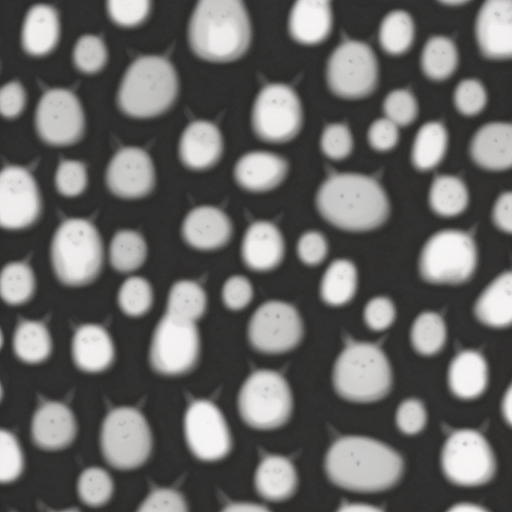

In [3]:
image

  0%|          | 0/1 [00:00<?, ?it/s]

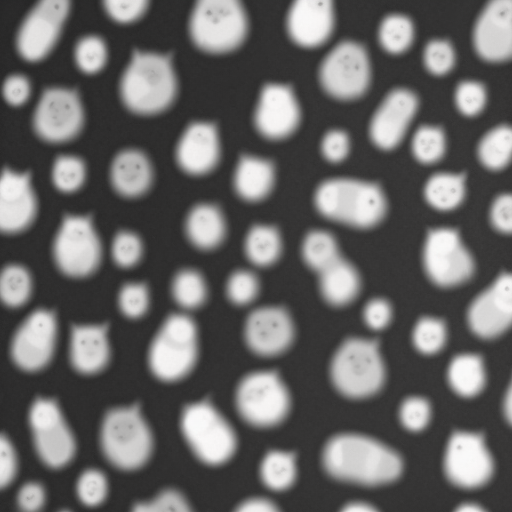

In [4]:
image_rgb_np = np.asarray([image_np, image_np, image_np]).swapaxes(0, 2).swapaxes(0, 1)
init_image = PIL.Image.fromarray(image_rgb_np)
init_image = init_image.resize((512, 512))

result = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0).images[0]
result

In [20]:

def play(image_np, prompt:str="", num_inference_steps:int=2, strength:float=0.5, guidance_scale:float=0.0, random:float=0):

    image_rgb_np = np.asarray([image_np, image_np, image_np]).swapaxes(0, 2).swapaxes(0, 1)
    init_image = PIL.Image.fromarray(image_rgb_np)
    init_image = init_image.resize((512, 512))
    
    result = pipe(prompt, image=init_image, num_inference_steps=num_inference_steps, strength=strength, guidance_scale=guidance_scale).images[0]
    
    return np.array(result)

  0%|          | 0/1 [00:00<?, ?it/s]

StackViewNDArray([[[ 74,  73,  72],
                   [ 59,  58,  59],
                   [ 51,  51,  51],
                   ...,
                   [232, 229, 229],
                   [228, 227, 228],
                   [230, 227, 227]],

                  [[ 73,  72,  72],
                   [ 60,  58,  59],
                   [ 52,  51,  51],
                   ...,
                   [231, 229, 228],
                   [230, 228, 229],
                   [229, 227, 228]],

                  [[ 75,  74,  75],
                   [ 62,  61,  61],
                   [ 51,  51,  51],
                   ...,
                   [232, 229, 230],
                   [230, 229, 228],
                   [232, 228, 228]],

                  ...,

                  [[155, 154, 157],
                   [135, 134, 135],
                   [113, 114, 114],
                   ...,
                   [ 55,  55,  54],
                   [ 56,  56,  55],
                   [ 58,  58,  57]],

                  [[162, 164, 166],
                   [147, 148, 148],
                   [129, 129, 130],
                   ...,
                   [ 55,  54,  53],
                   [ 56,  55,  55],
                   [ 61,  59,  58]],

                  [[168, 170, 172],
                   [159, 159, 160],
                   [142, 142, 143],
                   ...,
                   [ 56,  55,  55],
                   [ 58,  57,  55],
                   [ 59,  58,  55]]], dtype=uint8)
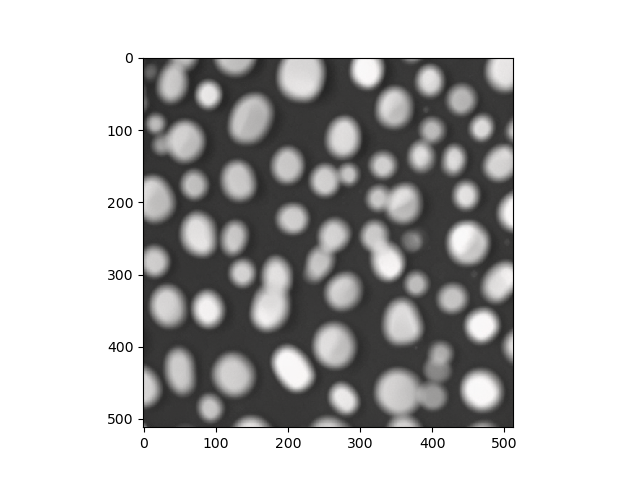
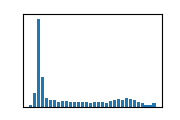

In [21]:
prompt = "blur the image a tiny bit"

stackview.insight(play(image_np, prompt))

In [22]:

stackview.interact(play, image_np, 
                   prompt="Put cats instead of the white blobs",
                   num_inference_steps=IntSlider(min=2, max=10, value=3),
                   strength=FloatSlider(min=0.5, max=1, value=0.7, step=0.05),
                   guidance_scale=FloatSlider(min=0, max=10, value=0.0, step=3)
                  )